In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import json
from pprint import pprint



In [ ]:
# ***** TRAIN DATASET EDA********

In [3]:
#Open train dataset
with open('/Users/alirossi/Desktop/recipe-ingredients-dataset/train.json') as f:
    dict_train = json.load(f)

train = pd.DataFrame(dict_train)
train

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [4]:
#Train dataset was imported into a DataFrame
type(train)

pandas.core.frame.DataFrame

In [5]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [6]:
#Train dataset has three columns - cuisine, ID, and ingredients. Rows represent individual recipes.
train.columns

Index(['cuisine', 'id', 'ingredients'], dtype='object')

In [7]:
#Cuisine and ingredients are objects, while ID is an integer
train.dtypes

cuisine        object
id              int64
ingredients    object
dtype: object

In [8]:
#Train dataset has almost 40K rows (recipes)
train.shape

(39774, 3)

In [9]:
#Train dataset has no null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [10]:
#There are 20 cuisines represented, with Italian being most heavily present (~8K / ~40K recipes)
train.cuisine.describe()

count       39774
unique         20
top       italian
freq         7838
Name: cuisine, dtype: object

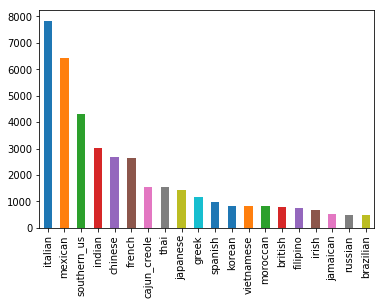

In [23]:
#Visualize cuisine representation across recipes - Mexican also highly represented
train.cuisine.value_counts().plot(kind='bar') 

In [20]:
train.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [11]:
#Create a list of ingredients across all recipes
ingredient_list = []
for h in range(0, (len(train.cuisine))):
    for i in range(0, len(train.ingredients[h])):
        ingredient_list.append(((train.ingredients[h][i]), 1))


In [12]:
#Aggregate ingredient counts into a dictionary
from collections import defaultdict
train_dict = defaultdict(list)
for k, s in ingredient_list:
    train_dict[k].append(s)
for k in train_dict:
    train_dict[k] = sum(train_dict[k])
print(train_dict)

defaultdict(<class 'list'>, {'romaine lettuce': 270, 'black olives': 229, 'grape tomatoes': 228, 'garlic': 7380, 'pepper': 4438, 'purple onion': 1896, 'seasoning': 137, 'garbanzo beans': 148, 'feta cheese crumbles': 358, 'plain flour': 154, 'ground pepper': 385, 'salt': 18049, 'tomatoes': 3058, 'ground black pepper': 4785, 'thyme': 361, 'eggs': 3388, 'green tomatoes': 108, 'yellow corn meal': 341, 'milk': 2263, 'vegetable oil': 4385, 'mayonaise': 781, 'cooking oil': 483, 'green chilies': 768, 'grilled chicken breasts': 5, 'garlic powder': 1442, 'yellow onion': 1184, 'soy sauce': 3296, 'butter': 4848, 'chicken livers': 65, 'water': 7457, 'wheat': 26, 'black pepper': 2627, 'shallots': 1477, 'cornflour': 103, 'cayenne pepper': 1523, 'onions': 7972, 'garlic paste': 282, 'lemon juice': 1395, 'chili powder': 2036, 'passata': 24, 'oil': 1970, 'ground cumin': 2747, 'boneless chicken skinless thigh': 343, 'garam masala': 925, 'double cream': 40, 'natural yogurt': 18, 'bay leaf': 839, 'sugar': 6

In [13]:
#Let's see what the top 20 ingredients are across recipes
popular_ingredients = sorted(train_dict, key=lambda x: (-train_dict[x], x))
print(popular_ingredients[0:20])

['salt', 'olive oil', 'onions', 'water', 'garlic', 'sugar', 'garlic cloves', 'butter', 'ground black pepper', 'all-purpose flour', 'pepper', 'vegetable oil', 'eggs', 'soy sauce', 'kosher salt', 'green onions', 'tomatoes', 'large eggs', 'carrots', 'unsalted butter']


In [14]:
#How many unique ingredients are represented? Answer: 6,714
len(train_dict)

6714

In [52]:
#Let's look at Italian recipe ingredients to see if they vary from average ingredients.
#Creating a dictionary with all Italian ingredients and their counts in order to compare to total ingredient dictionary
train_ital_only = train[train.cuisine == 'italian']
train_ital_only = train_ital_only.reset_index(drop=True)

italian_ingredient_list = []
for h in range(0, (len(train_ital_only.cuisine))):
    for i in range(0, len(train_ital_only.ingredients[h])):
        italian_ingredient_list.append(((train_ital_only.ingredients[h][i]), 1))
#print(italian_ingredient_list)

from collections import defaultdict
italian_dict = defaultdict(list)
for k, s in italian_ingredient_list:
    italian_dict[k].append(s)
for k in italian_dict:
    italian_dict[k] = sum(italian_dict[k])
print(italian_dict)

defaultdict(<class 'list'>, {'sugar': 760, 'pistachio nuts': 7, 'white almond bark': 1, 'flour': 142, 'vanilla extract': 219, 'olive oil': 3111, 'almond extract': 56, 'eggs': 627, 'baking powder': 186, 'dried cranberries': 8, 'chopped tomatoes': 37, 'fresh basil': 787, 'garlic': 1471, 'extra-virgin olive oil': 1362, 'kosher salt': 656, 'flat leaf parsley': 588, 'pimentos': 16, 'sweet pepper': 7, 'dried oregano': 626, 'sharp cheddar cheese': 9, 'pepper': 965, 'swiss cheese': 7, 'provolone cheese': 138, 'canola oil': 41, 'mushrooms': 184, 'black olives': 67, 'sausages': 58, 'Italian parsley leaves': 74, 'walnuts': 38, 'hot red pepper flakes': 76, 'fresh lemon juice': 471, 'trout fillet': 3, 'garlic cloves': 1619, 'chipotle chile': 2, 'fine sea salt': 77, 'fresh parmesan cheese': 251, 'butter': 1030, 'all-purpose flour': 918, 'fat free less sodium chicken broth': 158, 'chopped fresh chives': 68, 'gruyere cheese': 18, 'ground black pepper': 1444, 'bacon slices': 48, 'gnocchi': 41, 'fat fre

In [170]:
#Create a DataFrame to compare % of Italian recipes an Italian ingredient appears in vs. % of non-Italian recipes.
#Created an index for comparison - indices over 120 are considered significant and show that the ingredient is
#significantly present more often in Italian recipes than non-Italian.
#Note - had to remove all ingredients that appeared in NO non-Italian recipes due to divide by zero error.

import pandas as pd
italian_df = pd.DataFrame.from_dict(italian_dict, orient='index', columns=['ital_rec_count'])
italian_df.sort_values('ital_rec_count', ascending=False, inplace = True)

italian_df['pct_ital_recs'] = italian_df['ital_rec_count'] / ((len(train_ital_only.cuisine) + 1))

italian_df['ttl_rec_count'] = pd.Series(train_dict)
italian_df['pct_ttl_rec'] = italian_df['ttl_rec_count'] / ((len(train.cuisine) + 1))

italian_df['ttl_rec_count_x_ital'] = italian_df['ttl_rec_count'] - italian_df['ital_rec_count']
italian_df['pct_ttl_rec_x_ital'] = italian_df['ttl_rec_count_x_ital'] / (len(train.cuisine) + 1)

italian_df = italian_df[italian_df.ttl_rec_count_x_ital > 0]
italian_df['ital_index'] = (italian_df['pct_ital_recs'] / italian_df['pct_ttl_rec_x_ital']) * 100

italian_df.head(20).sort_values('ital_index', ascending=False)

,ital_rec_count,pct_ital_recs,ttl_rec_count,pct_ttl_rec,ttl_rec_count_x_ital,pct_ttl_rec_x_ital,ital_index
grated parmesan cheese,1580,0.201556,1886,0.0474167,306,0.00769327,2619.9
fresh basil,787,0.100395,1137,0.0285858,350,0.0087995,1140.92
dry white wine,658,0.083939,1218,0.0306223,560,0.0140792,596.194
extra-virgin olive oil,1362,0.173747,2747,0.0690635,1385,0.0348209,498.973
fresh parsley,631,0.080495,1604,0.0403268,973,0.0244626,329.053
olive oil,3111,0.396862,7972,0.200427,4861,0.122212,324.731
dried oregano,626,0.079857,1707,0.0429164,1081,0.0271779,293.831
ground black pepper,1444,0.184207,4785,0.120302,3341,0.0839975,219.301
garlic cloves,1619,0.206531,6237,0.156807,4618,0.116103,177.886
black pepper,636,0.081133,2627,0.0660465,1991,0.0500566,162.082


In [97]:
#Randomly select another cuisine and perform same test as with Italian cuisine
import random
z = random.randint(1,20)
print(z)

15


In [126]:
#Filipino with index 15 in train set cuisine DataFrame will be used
cuisine_value_counts_df = pd.DataFrame(train.cuisine.value_counts())
cuisine_value_counts_df = cuisine_value_counts_df.reset_index()
print("We will now work with {} data in the same manner as the Italian ingredients".format(cuisine_value_counts_df['index'][z]))

We will now work with filipino data in the same manner as the Italian ingredients


In [175]:
#Perform same analysis with Filipino ingredients/recipes as with Italian
train_fil_only = train[train.cuisine == 'filipino']
train_fil_only = train_fil_only.reset_index(drop=True)

fil_ingredient_list = []
for h in range(0, (len(train_fil_only.cuisine))):
    for i in range(0, len(train_fil_only.ingredients[h])):
        fil_ingredient_list.append(((train_fil_only.ingredients[h][i]), 1))

from collections import defaultdict
fil_dict = defaultdict(list)
for k, s in fil_ingredient_list:
    fil_dict[k].append(s)
for k in fil_dict:
    fil_dict[k] = sum(fil_dict[k])
#print(fil_dict)

fil_df = pd.DataFrame.from_dict(fil_dict, orient='index', columns=['fil_rec_count'])
fil_df.sort_values('fil_rec_count', ascending=False, inplace = True)

fil_df['pct_fil_recs'] = fil_df['fil_rec_count'] / ((len(train_fil_only.cuisine) + 1))

fil_df['ttl_rec_count'] = pd.Series(train_dict)
fil_df['pct_ttl_rec'] = fil_df['ttl_rec_count'] / ((len(train.cuisine) + 1))

fil_df['ttl_rec_count_x_fil'] = fil_df['ttl_rec_count'] - fil_df['fil_rec_count']
fil_df['pct_ttl_rec_x_fil'] = fil_df['ttl_rec_count_x_fil'] / (len(train.cuisine) + 1)

fil_df = fil_df[fil_df.ttl_rec_count_x_fil > 0]
fil_df['fil_index'] = (fil_df['pct_fil_recs'] / fil_df['pct_ttl_rec_x_fil']) * 100

fil_df.head(20).sort_values('fil_index', ascending=False)

,fil_rec_count,pct_fil_recs,ttl_rec_count,pct_ttl_rec,ttl_rec_count_x_fil,pct_ttl_rec_x_fil,fil_index
cooking oil,92,0.121693,483,0.0121433,391,0.0098303,1237.94
bay leaves,97,0.128307,1036,0.0260465,939,0.0236078,543.494
coconut milk,74,0.097884,854,0.0214708,780,0.0196103,499.144
oil,166,0.219577,1970,0.0495286,1804,0.0453551,484.128
fish sauce,98,0.129630,1247,0.0313514,1149,0.0288875,448.74
soy sauce,251,0.332011,3296,0.0828661,3045,0.0765556,433.685
brown sugar,81,0.107143,1503,0.0377876,1422,0.0357511,299.691
carrots,128,0.169312,2814,0.070748,2686,0.0675299,250.722
pepper,199,0.263228,4438,0.111578,4239,0.106574,246.989
garlic,325,0.429894,7380,0.185544,7055,0.177373,242.368


In [ ]:
# ******TEST DATASET EDA *********

In [176]:
#Load in test dataset
with open('/Users/alirossi/Desktop/recipe-ingredients-dataset/test.json') as f:
    dict_test = json.load(f)

test = pd.DataFrame(dict_test)
test

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
5,38527,"[baking powder, all-purpose flour, peach slice..."
6,19666,"[grape juice, orange, white zinfandel]"
7,41217,"[ground ginger, white pepper, green onions, or..."
8,28753,"[diced onions, taco seasoning mix, all-purpose..."
9,22659,"[eggs, cherries, dates, dark muscovado sugar, ..."


In [177]:
#Test dataset is also loaded in as a DataFrame
type(test)

pandas.core.frame.DataFrame

In [179]:
#As suspected, test set does not have "cuisine" column
test.columns

Index(['id', 'ingredients'], dtype='object')

In [181]:
#Test set has ~10K recipes to categorize
test.shape

(9944, 2)

In [182]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
id             9944 non-null int64
ingredients    9944 non-null object
dtypes: int64(1), object(1)
memory usage: 155.5+ KB


In [186]:
#How many test set ingredients are not in the training set? - Answer: 469
counter = 0
for h in range(0, (len(test.ingredients))):
    for i in range(0, len(test.ingredients[h])):
        if test.ingredients[h][i] not in train_dict:
            print(test.ingredients[h][i])
            counter += 1
print(counter)

Grey Poupon Dijon Mustard
chicken seasoning mix
japanese greens
krachai
Nu-Salt Salt Substitute
pork steaks
stir fry noodles
bluefish
reduced fat reduced sodium condensed cream of chicken soup
rapini
nonfat thousand island dressing
tri color pasta twists, cooked and drained
spring chicken
rouget
dress russian
elderflower syrup
Daisy Brand Light Sour Cream
pomegranate syrup
vegetable base
medium grain brown rice
knorr shrimp flavor bouillon cube
multigrain bread
fresh
american long grain rice
potato sticks
shanghai-style noodles
celery cabbage
moscato d'asti
frozen cranberries
horse gram
white lentils
Holland House White Cooking Wine
cracked peppercorn
TACO BELL® Thick & Chunky Medium Salsa
beef strips
cooked cut green beans
wish-bone deluxe french dressing
Silk Original Soymilk
unsalted creamy peanut butter
fresh ham butt
cupcakes
bertolli vidalia onion with roast garlic sauc
surimi
Goya Corn Oil
low fat small curd cottag chees
konbu dashi
pesto sauce mix
tofu mayonnaise
tarragon sprig

whiting
ground pork fat
lemon flavor instant pudding mix
cholent
whiting
Spanish tuna
promis spread stick
spring salad mix
enchilada seasoning
Kettle Chips
breaded chicken fillets
braised seitan
50% less sodium black beans
indian bay leaf
cal
american long grain rice
bitter orange juice
Franks Wings Sauce
dried ziti
frozen peeled prawns
lovage
cooking greens
fraise
soft cheese
new mexican chile
pork strips
shark fillets
469


In [189]:
#What percent of test set ingredients are not represented in training set? Is 469 a significant number?
#Create dictionary with all test set ingredients and aggregated count
#Answer: 10% of test set ingredients are not represented in the training set
test_ingredient_list = []
for h in range(0, (len(test.ingredients))):
    for i in range(0, len(test.ingredients[h])):
        test_ingredient_list.append(((test.ingredients[h][i]), 1))
        
from collections import defaultdict
test_dict = defaultdict(list)
for k, s in test_ingredient_list:
    test_dict[k].append(s)
for k in test_dict:
    test_dict[k] = sum(test_dict[k])
print("{} of the test set ingredients ({} / {}) are not represented in the training set.".format((counter/len(test_dict)), counter, len(test_dict)))

0.10459411239964318 of the test set ingredients (469 / 4484) are not represented in the training set.


In [194]:
#This leads to the question - across the train and test sets, how many ingredients are "one-offs" -
#only each present in one recipe?

test_ing_ones = sum(1 for i in test_dict.values() if i == 1)
train_ing_ones = sum(1 for i in train_dict.values() if i == 1)

print("Train set ingredients only in one recipe = {} ({} / {})".format(train_ing_ones/len(train_dict), train_ing_ones, len(train_dict)))
print("Test set ingredients only in one recipe = {} ({} / {})".format(test_ing_ones/len(test_dict), test_ing_ones, len(test_dict)))

Train set ingredients only in one recipe = 0.26191185229303154 (1759 / 6716)
Test set ingredients only in one recipe = 0.3307314897413024 (1483 / 4484)


In [207]:
total_dict = defaultdict(list)
total_dict = train_dict.copy()
for k in test_dict:
    s = test_dict[k]
    if k in total_dict:
        total_dict[k].append(s)
    else:
        total_dict[k] = test_dict[k]
total_dict
#for k in total_dict:
#    total_dict[k] = sum(total_dict[k])
#total_dict

AttributeError: 'int' object has no attribute 'append'

In [ ]:
#SUMMARY
#No values are missing from the train dataset. However, only 20 cuisines are represented, with Italian and Mexican
#having much heavier representation versus other cuisines.

#The ingredients are stored as lists within each recipe, with 6,714 total ingredients found across almost 40,000
#recipes. One issue may be that the ingredients are not normalized or categorized - some contain brand names or
#descriptive words which would make them appear to be unique and unrelated to other ingredient values.
#One decision may need to be whether to look at each ingredient entry as its own entity, or at each individual
#word within the ingredients; as well as whether to use dummy variables for each ingredient.

#Looking at Italian recipe ingredients as an example, we see that out of the top 20 Italian recipe ingredients,
#16 of them are more likely (20% or greater) to be in Italian recipes than non-Italian recipes (by magnitude of
#over-index: grated parmesan cheese, fresh basil, dry white wine, extra-virgin olive oil, fresh parsley, olive oil,
#dried oregano, ground black pepper, garlic cloves, black pepper, pepper, butter, kosher salt, garlic,
#all-purpose flour, salt).

#The same effect is seen with a randomly chosen cusine - Filipino (16th ranked cuisine in the dataset). Similar to
#Italian recipes, 16 of the Filipino top 20 ingredients overindex for Filipino recipes (by magnitude of over-index:
#cooking oil, bay leaves, coconut milk, oil, fish sauce, soy sauce, brown sugar, carrots, pepper, garlic, water,
#onions, ginger, eggs, ground black pepper, and salt). Note that some of these ingredients are the same as Italian
#top ingredients, but the assumption is that combinations of ingredients will represent a cuisine profile and enable
#us to predict cuisines pretty well.

#The test dataset provided by Kaggle contains almost 10,000 recipes, with only ID and ingredients list. There are no
#null values. 10% of the ingredients in the test dataset are not in the training dataset.